In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('heart_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
X = df.drop('heart disease', axis=1)
y = df['heart disease'].copy()

In [7]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [8]:
#  Train - test split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [10]:
#Building decision tree model
#use all default parameters except depth

from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
from IPython.display import Image
from sklearn.tree import export_graphviz

In [14]:
import pydotplus
import graphviz

In [15]:
from io import StringIO

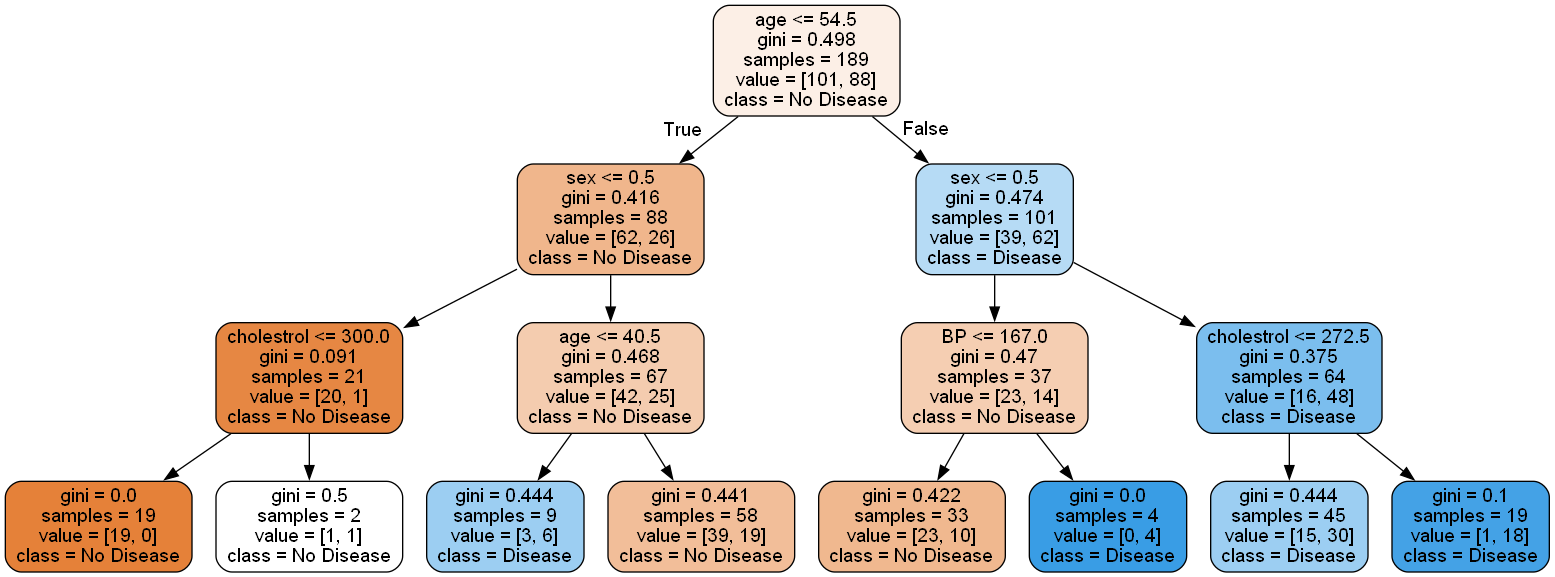

In [16]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
# Evaluating model performance on the test set

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [20]:
print('Test set performance')
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

Test set performance
0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)